# Udacity Data Analyst Nanodegree
## P2: Investigate a Dataset
#### Author: David Venturi
#### Date: May 2, 2016

## Background Information

**What is a balk?** [Pro Baseball Insider](http://probaseballinsider.com/baseball-instruction/what-is-a-balk/) has the simplest definition:
> In the simplest sense, a balk is when the pitcher tries to intentionally deceive the hitter or runner.  It can be a flinch on the mound after the pitcher gets set, a deceptive pick off attempt, or even just as simple as dropping the ball once you become set.  There are many actions that can result in a balk.  When runners are on base and a balk is called, all the runners move up one base.

A full list of the actions that consitute a balk can be found [here](https://en.wikipedia.org/wiki/Balk#Balk_actions).

**Balks are rare.** Since 2000, there have only been 100-200 balks per season, which is roughly one every 12 to 24 games in a full 2430-game season.

**Balks are difficult to spot.** They sometimes go unnoticed. What consitutes a balk might be subjective depending on the umpire. They might even be ignored by umpires depending on the situation.

**The definition of a balk has changed over time.** Throughout baseball history, there have been a number of tweaks to the balk rule. With each tweak, balk totals for the subsequent season tended to spike or dip.

## Questions for Investigation

How

## Dataset

The 2015 version of The Lahman Baseball Database contains complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. The *Master* (player names, DOB, and biographical info), *Pitching* (pitching statistics), and *PitchingPost* (post-season pitching statistics) tables are required for this balk analysis.

The [full database](http://www.seanlahman.com/baseball-archive/statistics/) and a [detailed description](http://seanlahman.com/files/database/readme2014.txt) of its contents can be found on Sean Lahman's website.

In [3]:
import pandas as pd
# import os
# script_dir = os.path.dirname(__file__) #<-- absolute dir the script is in
# rel_path = '/baseballdatabank-master/core/Pitching.csv'
# abs_file_path = os.path.join(script_dir, rel_path)

master_df = pd.read_csv('../p2/baseballdatabank-master/core/Master.csv')
pitching_df = pd.read_csv('../p2/baseballdatabank-master/core/Pitching.csv')
pitchingpost_df = pd.read_csv('../p2/baseballdatabank-master/core/PitchingPost.csv')
batting_df = pd.read_csv('../p2/baseballdatabank-master/core/Batting.csv')
battingpost_df = pd.read_csv('../p2/baseballdatabank-master/core/BattingPost.csv')

Populating the interactive namespace from numpy and matplotlib


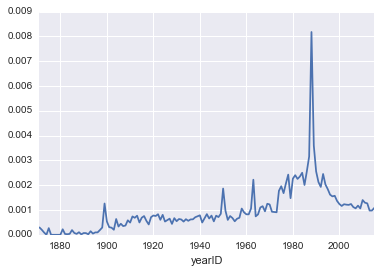

In [5]:
# master_df.head()
# pitching_df.head()
# pitchingpost_df.head()
balks_by_year = pitching_df.groupby('yearID')['BK'].sum()
ipouts_by_year = pitching_df.groupby('yearID')['IPouts'].sum()
balks_ipouts_by_year = balks_by_year / ipouts_by_year

%pylab inline
# import matplotlib.pyplot as plt
import seaborn as sns

balks_ipouts_by_year.plot()

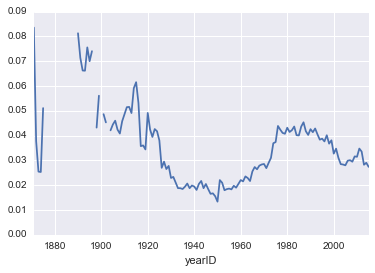

In [6]:
sb_by_year = batting_df.groupby('yearID')['SB'].sum()
cs_by_year = batting_df.groupby('yearID')['CS'].sum()
sb_attempts_by_year = sb_by_year + cs_by_year
sb_attempts_ipouts_by_year = sb_attempts_by_year / ipouts_by_year

sb_attempts_ipouts_by_year.plot()